<a href="https://colab.research.google.com/github/Izainea/tutoria_mlii_ean/blob/main/Introduccion%20redes%20neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introducción a Redes Neuronales Artificiales

Este cuaderno proporciona una introducción práctica a las redes neuronales artificiales, desde los conceptos básicos hasta la implementación con TensorFlow/Keras. Aprenderemos los fundamentos y haremos ejemplos de clasificación con diferentes conjuntos de datos.



## 1. Fundamentos de Redes Neuronales

### 1.1 Inspiración Biológica y Perceptrón

Las redes neuronales artificiales están inspiradas en la estructura y funcionamiento del cerebro humano. La unidad básica es el **perceptrón**, que modela matemáticamente el comportamiento de una neurona:

![Perceptrón](https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/600px-ArtificialNeuronModel_english.png)

Un perceptrón recibe múltiples entradas (x₁, x₂, ..., xₙ), cada una asociada a un peso (w₁, w₂, ..., wₙ). La salida se calcula como:

y = f(∑ wᵢxᵢ + b)

Donde:
- ∑ wᵢxᵢ es la suma ponderada de las entradas
- b es un término de sesgo (bias)
- f es una función de activación no lineal

La función de activación introduce la no-linealidad que permite a las redes neuronales aprender patrones complejos. Sin esta no-linealidad, las redes neuronales serían equivalentes a un modelo lineal simple.

### 1.2 Limitaciones del Perceptrón Simple

El perceptrón simple solo puede representar funciones linealmente separables. El ejemplo clásico es la operación XOR, que no puede ser resuelta por un solo perceptrón:

| x₁ | x₂ | XOR |
|----|----|----|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 0  |

Un perceptrón simple solo puede dibujar una línea recta en el espacio de características. Para problemas como XOR, necesitamos poder dibujar fronteras de decisión más complejas.

### 1.3 Redes Multicapa

Para superar las limitaciones del perceptrón simple, conectamos múltiples perceptrones en capas, formando una **red neuronal multicapa**:

![Red Neuronal](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/500px-Colored_neural_network.svg.png)

Una red neuronal típica tiene:
- Una capa de entrada: recibe los datos originales
- Una o más capas ocultas: aprenden representaciones cada vez más abstractas
- Una capa de salida: produce la predicción final

Esta estructura permite aprender representaciones complejas y resolver problemas no lineales como XOR. Cada capa transforma los datos de entrada en una representación más útil para la tarea final.

Lo que hace poderosas a las redes neuronales multicapa es su capacidad para aprender automáticamente las características importantes a partir de los datos, sin necesidad de diseñarlas manualmente.



![img1](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN1.png)


Consisten en una capa de entrada, varias capas ocultas y una capa de salida. Cada nodo de una capa está conectado a todos los demás nodos de la siguiente capa. Representa lo que estudiamos hace un momento, el perceptrón:

![img2](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN2.png)

Después de que cada perceptrón aplica los pesos obtenidos y se tiene la salida después de aplicar la función de activación entonces cada salida se convierte en la entrada para la siguiente capa. Los cálculos fluyen el diagrama de izquierda a derecha y la salida final se calcula realizando este procedimiento para todos los nodos.

El objetivo de esta red neuronal profunda es aprender los pesos asociados a cada flecha de la primera gráfica, en otras palabras, consiste en la estimación de las siguientes matrices:

![img3](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN3.png)

En ese sentido, aprovechando el gráfico anterior, entendemos que la salida, para la red representada en esa figura, se calcula de la siguiente forma:

$$y=f(f(f(x\cdot W_1)\cdot W_2)\cdot W_3)$$

En este caso, todos los perceptrones tienen la misma función de activación $f$. El sesgo no esta incluido en la fórmula anterior, pero podemos ignorarlo mientras concebimos la intuición detrás de estas redes neuronales.

### Intuición sobre el cálculo

Para entender mejor el cálculo, pensemos en un ejemplo sencillo con valores concretos:
- Supongamos que tenemos un vector de entrada x = [0.5, 0.3]
- La primera matriz de pesos W₁ podría ser [[0.1, 0.2], [0.3, 0.4]]
- La función de activación f podría ser la función sigmoide: f(x) = 1/(1+e^(-x))

El cálculo pasaría por estas etapas:
1. Multiplicar x·W₁ = [0.5, 0.3]·[[0.1, 0.2], [0.3, 0.4]] = [0.14, 0.22]
2. Aplicar la activación: f([0.14, 0.22]) = [0.535, 0.555]
3. Este resultado se convierte en la entrada para la siguiente capa, y así sucesivamente

Esta "cascada" de cálculos permite que la red aprenda representaciones cada vez más abstractas del dato original.


# Backpropagation: El Algoritmo que Revolucionó el Aprendizaje Profundo

## Introducción

El backpropagation (propagación hacia atrás) es el algoritmo central que permite a las redes neuronales aprender de manera eficiente. Desarrollado en la década de 1970 y popularizado en 1986 por Rumelhart, Hinton y Williams, este algoritmo resolvió uno de los problemas fundamentales en el campo: ¿cómo entrenar eficientemente redes neuronales multicapa?

## Fundamentos conceptuales

Para entender el backpropagation, primero debemos comprender qué problema resuelve. En una red neuronal:

1. Los datos fluyen desde la entrada hasta la salida (forward pass)
2. La red genera una predicción que se compara con el valor real
3. Se calcula un error basado en esta diferencia
4. **El desafío**: Determinar cómo modificar cada peso de la red para reducir este error

El backpropagation proporciona un método matemáticamente elegante para calcular cómo cada peso contribuye al error final, permitiendo actualizar todos los pesos de manera óptima.

## El algoritmo paso a paso

### 1. Propagación hacia adelante (Forward Pass)

- Los datos de entrada $X$ se introducen en la primera capa
- Para cada capa $l$, calculamos:
  - Suma ponderada: $Z^l = W^l \cdot A^{l-1} + b^l$
  - Activación: $A^l = f(Z^l)$ donde $f$ es la función de activación
- La salida de la última capa es la predicción de la red $\hat{Y}$

### 2. Cálculo del error

- Comparamos la predicción $\hat{Y}$ con el valor real $Y$
- Calculamos el error según la función de pérdida elegida
  - Por ejemplo, error cuadrático medio: $E = \frac{1}{2}(Y - \hat{Y})^2$

### 3. Propagación hacia atrás (Backward Pass)

Esta es la esencia del algoritmo:

- Calculamos el gradiente del error respecto a la salida: $\delta^L = \frac{\partial E}{\partial Z^L}$
- Para cada capa, de la última a la primera:
  - Calculamos el gradiente respecto a los pesos: $\frac{\partial E}{\partial W^l} = \delta^l \cdot (A^{l-1})^T$
  - Calculamos el gradiente respecto a los sesgos: $\frac{\partial E}{\partial b^l} = \delta^l$
  - Propagamos el error a la capa anterior: $\delta^{l-1} = (W^l)^T \cdot \delta^l \odot f'(Z^{l-1})$

Donde $\odot$ representa el producto elemento a elemento (Hadamard) y $f'$ es la derivada de la función de activación.

### 4. Actualización de pesos

- Para cada peso y sesgo en la red:
  - $W^l = W^l - \eta \cdot \frac{\partial E}{\partial W^l}$
  - $b^l = b^l - \eta \cdot \frac{\partial E}{\partial b^l}$

Donde $\eta$ (eta) es la tasa de aprendizaje que controla la magnitud de los ajustes.

## La regla de la cadena: El corazón del backpropagation

El backpropagation se basa en la regla de la cadena del cálculo diferencial. Para un peso $w_{ij}$ en una capa intermedia, su contribución al error final se calcula como:

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial a_j} \cdot \frac{\partial a_j}{\partial z_j} \cdot \frac{\partial z_j}{\partial w_{ij}}$$

Esta fórmula muestra la elegancia del algoritmo:
- $\frac{\partial E}{\partial a_j}$ es la contribución de la activación $j$ al error
- $\frac{\partial a_j}{\partial z_j}$ es la derivada de la función de activación en el nodo $j$
- $\frac{\partial z_j}{\partial w_{ij}}$ es simplemente la entrada $i$ que llega al nodo $j$

La clave está en que podemos calcular estos gradientes de manera recursiva, comenzando desde la capa final y retrocediendo.

## Ejemplo numérico simplificado

Consideremos una red neuronal simple con:
- 2 entradas ($x_1$, $x_2$)
- 1 capa oculta con 2 neuronas
- 1 neurona de salida
- Función de activación sigmoide: $f(x) = \frac{1}{1+e^{-x}}$

**Forward pass:**
1. Entrada: $X = [0.5, 0.3]$
2. Pesos primera capa: $W^1 = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}$
3. Suma ponderada: $Z^1 = [0.14, 0.22]$
4. Activación: $A^1 = [0.535, 0.555]$
5. Pesos segunda capa: $W^2 = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix}$
6. Salida: $\hat{Y} = 0.598$
7. Valor real: $Y = 1$
8. Error: $E = \frac{1}{2}(1 - 0.598)^2 = 0.081$

**Backward pass:**
1. Gradiente en la salida: $\delta^2 = \frac{\partial E}{\partial Z^2} = (\hat{Y} - Y) \cdot f'(Z^2) = -0.402 \cdot 0.241 = -0.097$
2. Gradientes para $W^2$: $\frac{\partial E}{\partial W^2} = \delta^2 \cdot A^1 = [-0.052, -0.054]$
3. Propagación del error a la capa oculta: $\delta^1 = W^2 \cdot \delta^2 \odot f'(Z^1) = [-0.011, -0.013]$
4. Gradientes para $W^1$: $\frac{\partial E}{\partial W^1} = \delta^1 \cdot X = \begin{bmatrix} -0.006 & -0.003 \\ -0.007 & -0.004 \end{bmatrix}$

**Actualización de pesos** (con $\eta = 0.1$):
1. $W^2 = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} -0.052 \\ -0.054 \end{bmatrix} = \begin{bmatrix} 0.505 \\ 0.605 \end{bmatrix}$
2. $W^1$ = actualización similar para cada peso

## Derivación para el caso de múltiples salidas

Para redes con múltiples salidas, el proceso es similar pero trabajamos con vectores de error. Para una función de pérdida $E$:

$$\frac{\partial E}{\partial W^l} = \frac{\partial E}{\partial Z^l} \cdot \frac{\partial Z^l}{\partial W^l}$$

Donde $\frac{\partial E}{\partial Z^l}$ es el vector de sensibilidad $\delta^l$ que indica cómo cambios en la entrada neta de cada neurona afectan el error total.

Para la capa de salida, este vector se calcula como:

$$\delta^L = \nabla_{\hat{Y}}E \odot f'(Z^L)$$

Y para capas anteriores:

$$\delta^l = ((W^{l+1})^T \cdot \delta^{l+1}) \odot f'(Z^l)$$

Esta formulación vectorial permite implementar el algoritmo de manera eficiente utilizando operaciones matriciales.

## Desafíos y soluciones

### El problema del desvanecimiento del gradiente

En redes profundas, los gradientes pueden hacerse extremadamente pequeños en las primeras capas, lo que ralentiza o detiene el aprendizaje.

Matemáticamente, esto ocurre porque:

$$\frac{\partial E}{\partial W^1} = \frac{\partial E}{\partial A^L} \cdot \frac{\partial A^L}{\partial Z^L} \cdot \frac{\partial Z^L}{\partial A^{L-1}} \cdot ... \cdot \frac{\partial A^2}{\partial Z^2} \cdot \frac{\partial Z^2}{\partial A^1} \cdot \frac{\partial A^1}{\partial Z^1} \cdot \frac{\partial Z^1}{\partial W^1}$$

Si las derivadas $\frac{\partial A^l}{\partial Z^l}$ son pequeñas (como ocurre en los extremos de la función sigmoide), su producto se acerca a cero exponencialmente.

**Soluciones:**
- Funciones de activación como ReLU: $f(x) = \max(0, x)$ cuya derivada es 1 para valores positivos
- Inicialización cuidadosa de pesos (Xavier/Glorot, He)
- Conexiones residuales (skip connections)
- Normalización por lotes (batch normalization)

### El problema de la explosión del gradiente

Si las derivadas $\frac{\partial A^l}{\partial Z^l}$ son grandes, el producto puede crecer exponencialmente.

**Soluciones:**
- Recorte de gradientes: limitar $\|\nabla_W E\|$ a un umbral máximo
- Regularización $L1/L2$: añadir términos $\lambda\|W\|_1$ o $\lambda\|W\|_2^2$ al error
- Reducción de la tasa de aprendizaje

## Conclusión

El backpropagation constituye la columna vertebral matemática del aprendizaje profundo. Combinando principios de cálculo diferencial, álgebra lineal y optimización, este algoritmo permite a las redes neuronales aprender representaciones complejas de manera eficiente.

Su elegancia radica en que convierte un problema aparentemente intratable (ajustar millones de parámetros) en un proceso computacionalmente viable, abriendo las puertas a las poderosas aplicaciones de inteligencia artificial que vemos hoy en día.


## ¿Por qué funcionan las redes?

La esencia de las redes neuronales, por lo menos en esta versión inicial, consiste en la posibilidad de proyectar-transformar los registros de entrada en un espacio con mayor dimensión, con eso el proceso de clasificación se hace más sencillo, el siguiente gráfico ilustra esta situación:

![img4](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN4.png)

La proyección a otra dimensión permitió que hicieramos una separación como la siguiente:

![img5](https://raw.githubusercontent.com/Izainea/visualizacion/master/img/ANN5.png)

En resumen, las ANN son modelos de aprendizaje profundo muy flexibles pero potentes, permiten estimar aproximaciones a cualquier función compleja. Su aumento de popularidad se ha debido a tres razones:

1. **Trucos inteligentes** que hicieron posible el entrenamiento de estos modelos
   - Inicializaciones de pesos específicas
   - Funciones de activación mejoradas como ReLU
   - Técnicas de optimización avanzadas

2. **Aumento en la potencia computacional**
   - GPUs especializadas para cálculos matriciales
   - Entrenamiento distribuido
   - Optimizaciones a nivel de hardware

3. **Grandes cantidades de datos de entrenamiento**
   - Conjuntos de datos masivos para aprendizaje
   - Técnicas de data augmentation
   - Disponibilidad de datos pre-etiquetados

Un resultado teórico importante es el **Teorema de Aproximación Universal**, que establece que una red neuronal feedforward con una sola capa oculta que contiene un número finito de neuronas puede aproximar cualquier función continua en un subconjunto compacto de Rⁿ, bajo ciertas suposiciones sobre la función de activación.



## 2. Aprendizaje en Redes Neuronales

### 2.1 Funciones de Pérdida

Para que una red neuronal aprenda, necesitamos una forma de medir cuán equivocada está. Las **funciones de pérdida** cuantifican la diferencia entre las predicciones de la red y los valores reales:

- **Error Cuadrático Medio (MSE)**: Para problemas de regresión
  MSE = (1/n) * ∑(y_pred - y_real)²

  *Ventaja*: Penaliza fuertemente errores grandes
  *Desventaja*: Muy sensible a valores atípicos

- **Entropía Cruzada Binaria**: Para clasificación binaria
  BCE = -(y_real * log(y_pred) + (1-y_real) * log(1-y_pred))

  *Ventaja*: Muy efectiva para problemas de clasificación
  *Desventaja*: Puede producir gradientes inestables

- **Entropía Cruzada Categórica**: Para clasificación multiclase
  CCE = -∑(y_real * log(y_pred))

  *Ventaja*: Extiende BCE a múltiples clases
  *Desventaja*: Requiere codificación one-hot de etiquetas

La elección de la función de pérdida depende del tipo de problema (regresión vs. clasificación) y de las características específicas de los datos.

### 2.2 Descenso de Gradiente

El **descenso de gradiente** es un algoritmo de optimización que ajusta incrementalmente los pesos para minimizar la función de pérdida:

1. Inicializar los pesos con valores aleatorios
2. Calcular la predicción y la pérdida
3. Calcular la derivada de la pérdida respecto a cada peso (gradiente)
4. Ajustar los pesos en dirección opuesta al gradiente
5. Repetir hasta converger

La fórmula de actualización es:
w = w - η * ∂L/∂w

Donde η (eta) es la tasa de aprendizaje, un hiperparámetro que controla cuánto ajustamos los pesos en cada iteración:
- Si η es muy pequeña: el aprendizaje es lento pero estable
- Si η es muy grande: el aprendizaje es rápido pero puede diverger

El descenso de gradiente puede implementarse de diferentes formas:
- **Batch**: Utiliza todo el conjunto de datos
- **Mini-batch**: Utiliza subconjuntos aleatorios de datos
- **Estocástico**: Utiliza un solo ejemplo a la vez

### 2.3 Retropropagación (Backpropagation)

La **retropropagación** es un algoritmo eficiente para calcular gradientes en redes multicapa. Funciona propagando el error desde la salida hacia las capas anteriores:

1. **Propagación hacia adelante**: Calcular la salida de la red para una entrada dada
2. **Calcular el error**: Comparar la salida con el valor real usando la función de pérdida
3. **Propagar hacia atrás**: Calcular el gradiente de la pérdida respecto a cada peso, capa por capa
4. **Actualizar pesos**: Ajustar los pesos en dirección opuesta al gradiente

Este proceso aprovecha la regla de la cadena del cálculo para calcular eficientemente cómo cada peso contribuye al error final.

La retropropagación resuelve el problema fundamental de cómo asignar "culpa" del error a cada neurona en la red, permitiendo que todas las capas aprendan simultáneamente.



## 3. Implementación con Keras/TensorFlow

Comenzaremos configurando nuestro entorno e importando las bibliotecas necesarias:


In [3]:

# Importaciones básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

# Datasets y métricas
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Configuración
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Eager execution: {tf.executing_eagerly()}")


TensorFlow version: 2.18.0
Eager execution: True



### 3.1 Funciones de Visualización

Para entender mejor el comportamiento de nuestras redes neuronales, definiremos algunas funciones de visualización que nos ayudarán a:

1. Ver cómo la red divide el espacio de características (fronteras de decisión)
2. Observar el proceso de aprendizaje a través del tiempo
3. Analizar el rendimiento del modelo

Estas visualizaciones son cruciales para desarrollar intuición sobre cómo funcionan las redes neuronales.


In [4]:

def plot_decision_boundary(model, X, y, title='Frontera de Decisión'):
    """
    Visualiza la frontera de decisión creada por un modelo
    sobre un conjunto de datos bidimensional.

    Esta función nos permite ver cómo el modelo segmenta el espacio de características,
    mostrando las regiones donde clasifica puntos como pertenecientes a cada clase.
    """
    # Configurar el espacio de visualización
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Obtener predicciones del modelo para toda la grilla
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)

    if probs.shape[1] > 1:  # Caso multiclase
        z = np.argmax(probs, axis=1).reshape(xx.shape)
    else:  # Caso binario
        z = probs.reshape(xx.shape)

    # Crear la visualización
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, z, alpha=0.3,
                 cmap=plt.cm.RdBu if probs.shape[1] <= 2 else plt.cm.viridis)

    # Graficar los puntos de datos originales
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
               cmap=plt.cm.RdBu if len(np.unique(y)) <= 2 else plt.cm.viridis,
               edgecolor='black', s=80, alpha=0.7)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title, fontsize=16)
    plt.xlabel('Característica 1', fontsize=12)
    plt.ylabel('Característica 2', fontsize=12)
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    """
    Visualiza la evolución de la pérdida y precisión durante el entrenamiento.

    Esta función nos permite ver:
    1. Si el modelo está aprendiendo (pérdida disminuye, precisión aumenta)
    2. Si hay sobreajuste (rendimiento en validación empeora con el tiempo)
    3. Cuándo el modelo converge
    """
    plt.figure(figsize=(12, 5))

    # Gráfico de pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Evolución de la Pérdida', fontsize=14)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Pérdida', fontsize=12)
    plt.legend()

    # Gráfico de precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Evolución de la Precisión', fontsize=14)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Precisión', fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()



## 4. Ejemplos Prácticos

### 4.1 Clasificación Binaria

Empezaremos con un problema simple de clasificación binaria usando datos sintéticos. Este ejemplo nos permitirá ver cómo una red neuronal aprende a separar dos clases.

**¿Qué vamos a aprender?**
- Cómo generar datos sintéticos para clasificación
- Cómo construir un modelo básico de red neuronal
- Cómo visualizar el proceso de aprendizaje
- Cómo interpretar las métricas de evaluación


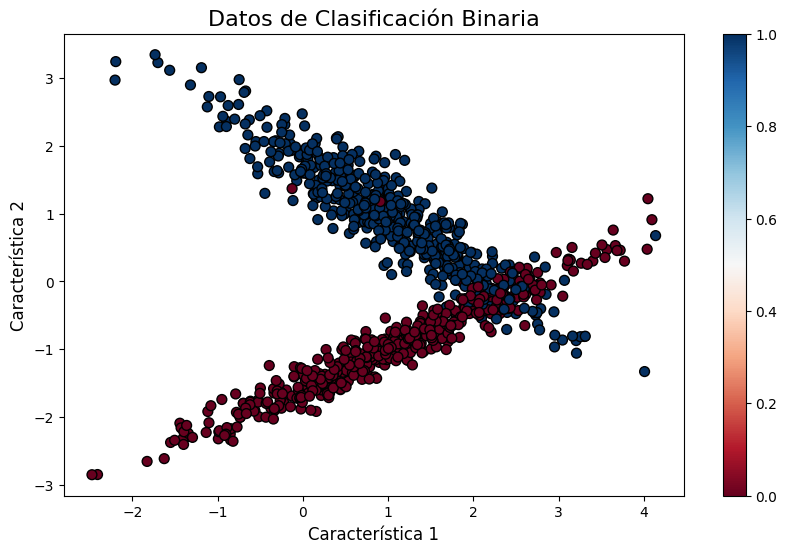

In [5]:

# Generamos datos sintéticos
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1)

# Visualizamos los datos
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='black', s=50)
plt.title('Datos de Clasificación Binaria', fontsize=16)
plt.xlabel('Característica 1', fontsize=12)
plt.ylabel('Característica 2', fontsize=12)
plt.colorbar()
plt.show()



Observamos que los datos generados forman dos grupos que son bastante distinguibles, pero con cierto solapamiento. Ahora dividiremos los datos en conjuntos de entrenamiento y prueba para poder evaluar nuestro modelo correctamente.


In [6]:

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Datos de entrenamiento: {X_train.shape}, Etiquetas: {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, Etiquetas: {y_test.shape}")


Datos de entrenamiento: (700, 2), Etiquetas: (700,)
Datos de prueba: (300, 2), Etiquetas: (300,)



### Creación del modelo

Ahora crearemos un modelo de red neuronal simple para clasificación binaria. Utilizaremos una arquitectura con:

1. Una capa de entrada con 2 características
2. Dos capas ocultas con 4 neuronas cada una y activación ReLU
3. Una capa de salida con 1 neurona y activación sigmoide

La función de activación **ReLU** (Rectified Linear Unit) se define como f(x) = max(0, x), y es una de las más utilizadas en capas ocultas por:
- Su capacidad para introducir no-linealidad
- Su eficiencia computacional
- Su resistencia al problema de desvanecimiento del gradiente

La función de activación **sigmoide** se define como f(x) = 1/(1+e^(-x)), y se utiliza en la capa de salida para problemas de clasificación binaria porque:
- Produce valores entre 0 y 1, que pueden interpretarse como probabilidades
- Su derivada es fácil de calcular: f'(x) = f(x) * (1 - f(x))


In [7]:

# Creamos un modelo simple de red neuronal
model = Sequential([
    Dense(4, input_shape=(2,), activation='relu', name='capa_oculta_1'),
    Dense(4, activation='relu', name='capa_oculta_2'),
    Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostramos el resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)                │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_oculta_2 (Dense)                │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_salida (Dense)                  │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)


El resumen anterior nos muestra:

1. La arquitectura de la red: capas, número de neuronas y activaciones
2. Los parámetros entrenables: pesos y sesgos que la red aprenderá
3. El número total de parámetros, que es relativamente pequeño para esta red simple

### Entrenamiento del modelo

Ahora entrenaremos nuestro modelo utilizando el conjunto de datos de entrenamiento:


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5601 - loss: 0.7305 - val_accuracy: 0.9214 - val_loss: 0.5730
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9277 - loss: 0.5310 - val_accuracy: 0.9143 - val_loss: 0.3846
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9286 - loss: 0.3305 - val_accuracy: 0.9357 - val_loss: 0.2203
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9221 - loss: 0.2193 - val_accuracy: 0.9429 - val_loss: 0.1734
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9371 - loss: 0.1925 - val_accuracy: 0.9429 - val_loss: 0.1764
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9357 - loss: 0.1842 - val_accuracy: 0.9500 - val_loss: 0.1718
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9367 - loss: 0.1782 - val_accuracy: 0.9500 - val_loss: 0.1666
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9421 - loss: 0.1737 - val_accuracy: 0.9500 - val_loss

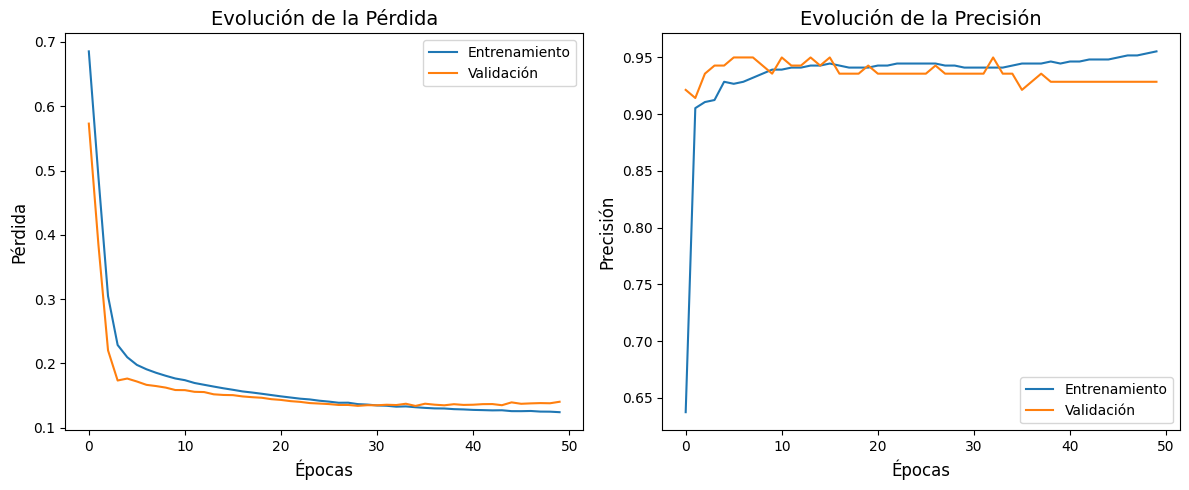

In [8]:

# Entrenamos el modelo
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=50,
                   validation_split=0.2,
                   verbose=1)

# Visualizamos el historial de entrenamiento
plot_training_history(history)



Las gráficas de entrenamiento nos muestran:

1. **Pérdida**: Cómo la función de pérdida (binary_crossentropy) disminuye con el tiempo
2. **Precisión**: Cómo la proporción de predicciones correctas aumenta con el tiempo

La diferencia entre las curvas de entrenamiento y validación nos da información sobre el posible sobreajuste. Si la curva de validación empeora mientras la de entrenamiento sigue mejorando, es una señal de que el modelo está memorizando el conjunto de entrenamiento en lugar de generalizar.

### Evaluación del modelo

Ahora evaluaremos el rendimiento de nuestro modelo en los datos de prueba, que no ha visto durante el entrenamiento:


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.1609 
Precisión en datos de prueba: 0.9333
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


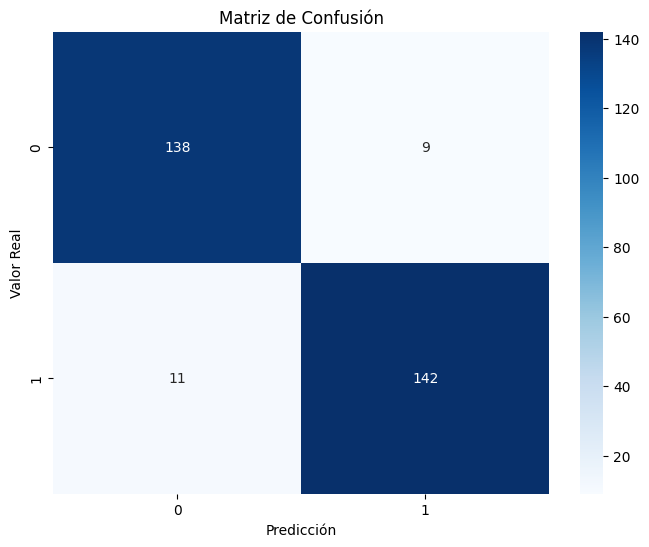

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       147
           1       0.94      0.93      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [9]:

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en datos de prueba: {accuracy:.4f}")

# Predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Métricas detalladas
print(classification_report(y_test, y_pred))



La matriz de confusión nos muestra:
- **Verdaderos positivos (TP)**: Casos positivos correctamente identificados
- **Falsos positivos (FP)**: Casos negativos incorrectamente clasificados como positivos
- **Verdaderos negativos (TN)**: Casos negativos correctamente identificados
- **Falsos negativos (FN)**: Casos positivos incorrectamente clasificados como negativos

El informe de clasificación nos proporciona métricas más detalladas:
- **Precisión**: TP / (TP + FP) - De todos los casos que el modelo clasifica como positivos, ¿cuántos son realmente positivos?
- **Recall**: TP / (TP + FN) - De todos los casos positivos reales, ¿cuántos identificó el modelo?
- **F1-score**: Media armónica de precisión y recall
- **Support**: Número de ocurrencias de cada clase

### Visualización de la frontera de decisión

Finalmente, visualizamos la frontera de decisión que ha aprendido nuestro modelo:


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


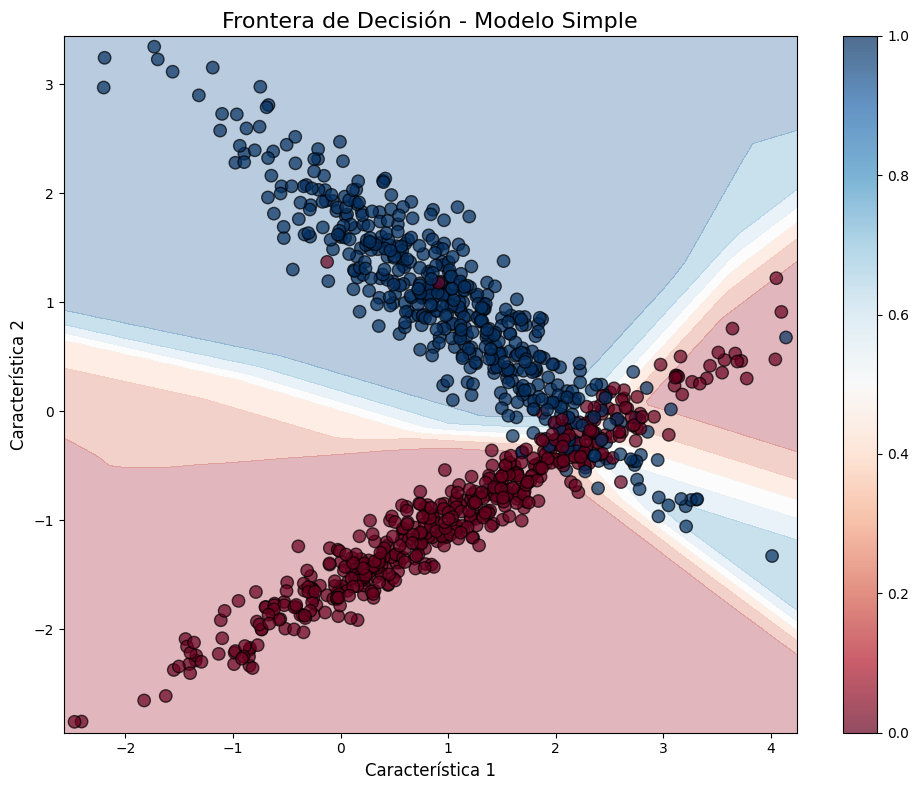

In [10]:

# Visualizamos la frontera de decisión
plot_decision_boundary(model, X, y, 'Frontera de Decisión - Modelo Simple')



### 4.2 Datos No Linealmente Separables

Ahora trabajaremos con un conjunto de datos más complejo que no es linealmente separable. Esto demostrará el poder de las redes neuronales para aprender fronteras de decisión complejas.

El conjunto de datos "make_moons" genera dos semicírculos entrelazados, un problema que no puede resolverse con un modelo lineal simple.


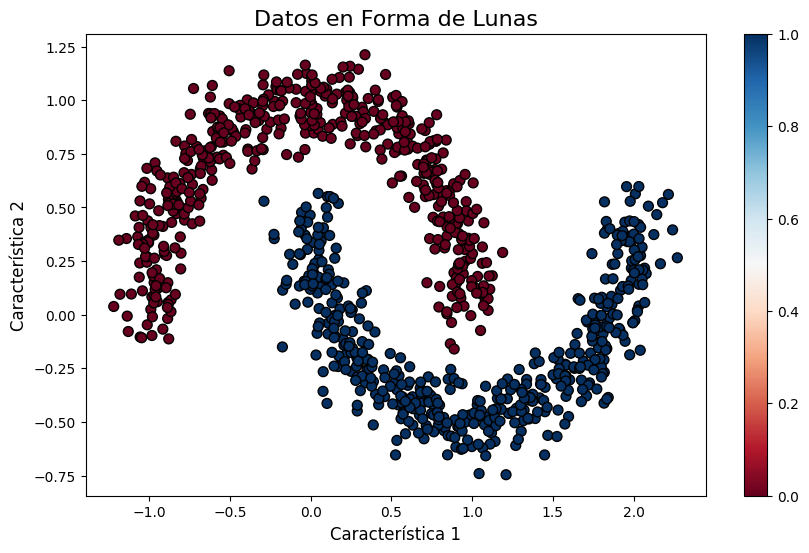

In [11]:

# Generamos datos en forma de lunas
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Visualizamos los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.RdBu, edgecolor='black', s=50)
plt.title('Datos en Forma de Lunas', fontsize=16)
plt.xlabel('Característica 1', fontsize=12)
plt.ylabel('Característica 2', fontsize=12)
plt.colorbar()
plt.show()



Estos datos tienen una estructura que claramente no puede separarse con una línea recta. Para este problema, necesitaremos una red neuronal con más capacidad (más capas y/o más neuronas) para aprender la frontera de decisión no lineal.

Crearemos un modelo con más capas y más neuronas por capa:


In [12]:

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# Creamos un modelo con más capas
model_moons = Sequential([
    Dense(8, input_shape=(2,), activation='relu', name='capa_oculta_1'),
    Dense(8, activation='relu', name='capa_oculta_2'),
    Dense(8, activation='relu', name='capa_oculta_3'),
    Dense(1, activation='sigmoid', name='capa_salida')
])

# Compilamos el modelo
model_moons.compile(optimizer=Adam(learning_rate=0.01),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Mostramos el resumen del modelo
model_moons.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)                │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_oculta_2 (Dense)                │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_oculta_3 (Dense)                │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_salida (Dense)                  │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)


Observa que hemos aumentado:
1. El número de capas ocultas (de 2 a 3)
2. El número de neuronas por capa (de 4 a 8)

Esto da a la red más flexibilidad para aprender patrones complejos. Ahora entrenamos el modelo:


In [ ]:

# Entrenamos el modelo
history_moons = model_moons.fit(X_train, y_train,
                              batch_size=32,
                              epochs=50,
                              validation_split=0.2,
                              verbose=1)

# Visualizamos el historial de entrenamiento
plot_training_history(history_moons)

# Evaluamos el modelo
loss, accuracy = model_moons.evaluate(X_test, y_test)
print(f"Precisión en datos de prueba: {accuracy:.4f}")

# Visualizamos la frontera de decisión
plot_decision_boundary(model_moons, X_moons, y_moons, 'Frontera de Decisión - Datos de Lunas')


Epoch 1/50



La frontera de decisión muestra la capacidad de la red neural para adaptarse a patrones no lineales. Observa cómo la frontera sigue la forma de las lunas, algo que un modelo lineal como regresión logística no podría hacer.

Esta es una de las grandes ventajas de las redes neuronales: su capacidad para aprender automáticamente representaciones que capturan la estructura subyacente de los datos, incluso cuando esta estructura es compleja y no lineal.



### 4.3 Clasificación Multiclase

Finalmente, veremos cómo abordar un problema de clasificación con más de dos clases. Los problemas de clasificación multiclase son comunes en aplicaciones del mundo real, como:

- Reconocimiento de dígitos escritos a mano (10 clases)
- Clasificación de especies de flores (múltiples especies)
- Categorización de textos (múltiples categorías)

Para este ejemplo, generaremos datos sintéticos con tres clases dispuestas en un patrón espiral:


In [ ]:

# Función para generar datos multiclase
def make_multiclass_data(n_samples=1000, n_classes=3, random_state=42):
    np.random.seed(random_state)

    X = np.zeros((n_samples, 2))
    y = np.zeros(n_samples, dtype=int)

    samples_per_class = n_samples // n_classes

    for i in range(n_classes):
        ix = range(samples_per_class * i, samples_per_class * (i + 1))
        r = np.linspace(0.0, 1, samples_per_class)
        t = np.linspace(i * 4, (i + 1) * 4, samples_per_class) + np.random.normal(0, 0.2, samples_per_class)
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = i

    return X, y

# Generamos datos multiclase
X_multi, y_multi = make_multiclass_data(n_samples=1500, n_classes=3)

# Visualizamos los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap=plt.cm.viridis, edgecolor='black', s=50)
plt.title('Datos de Clasificación Multiclase', fontsize=16)
plt.xlabel('Característica 1', fontsize=12)
plt.ylabel('Característica 2', fontsize=12)
plt.colorbar()
plt.show()



### Modificaciones para clasificación multiclase

Para la clasificación multiclase, necesitamos hacer dos cambios importantes:

1. **Capa de salida**: Ahora necesitamos una neurona por cada clase (3 en este caso)
2. **Función de activación**: Usamos softmax en lugar de sigmoid para la capa de salida

La función de activación **softmax** convierte las salidas en probabilidades que suman 1 entre todas las clases:

softmax(z)ᵢ = e^(zᵢ) / Σⱼ e^(zⱼ)

Donde zᵢ es la salida para la clase i antes de la activación.

También necesitamos convertir nuestras etiquetas a formato "one-hot" para el entrenamiento:


In [ ]:

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# Convertimos las etiquetas a formato one-hot
y_train_onehot = tf.keras.utils.to_categorical(y_train, 3)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 3)

# Ejemplo de codificación one-hot
print("Primeras 5 etiquetas originales:", y_train[:5])
print("Primeras 5 etiquetas en formato one-hot:")
print(y_train_onehot[:5])

# Creamos un modelo para clasificación multiclase
model_multi = Sequential([
    Dense(16, input_shape=(2,), activation='relu', name='capa_oculta_1'),
    Dense(16, activation='relu', name='capa_oculta_2'),
    Dense(3, activation='softmax', name='capa_salida')  # 3 clases
])

# Compilamos el modelo
model_multi.compile(optimizer=Adam(learning_rate=0.01),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Mostramos el resumen del modelo
model_multi.summary()


In [ ]:

# Entrenamos el modelo
history_multi = model_multi.fit(X_train, y_train_onehot,
                              batch_size=32,
                              epochs=50,
                              validation_split=0.2,
                              verbose=1)

# Visualizamos el historial de entrenamiento
plot_training_history(history_multi)

# Evaluamos el modelo
loss, accuracy = model_multi.evaluate(X_test, y_test_onehot)
print(f"Precisión en datos de prueba: {accuracy:.4f}")

# Visualizamos la frontera de decisión
plot_decision_boundary(model_multi, X_multi, y_multi, 'Frontera de Decisión - Multiclase')



Observa cómo la frontera de decisión ahora separa las tres clases. El modelo ha aprendido a identificar las regiones del espacio que corresponden a cada clase, creando un mapa de decisión que sigue el patrón espiral de los datos.

La precisión final del modelo nos muestra cuán bien ha aprendido a generalizar para este problema multiclase.



## 5. Ejercicios Guiados

### 5.1 Comparación de Funciones de Activación

Las funciones de activación son componentes críticos de las redes neuronales, ya que introducen la no-linealidad que permite a la red aprender patrones complejos. Vamos a comparar dos funciones de activación populares:

1. **tanh (tangente hiperbólica)**:
   - Rango: [-1, 1]
   - Centrada en cero
   - Tiene forma de S (sigmoide)

2. **ReLU (Rectified Linear Unit)**:
   - f(x) = max(0, x)
   - Rango: [0, ∞)
   - Computacionalmente eficiente
   - Ayuda a mitigar el problema del desvanecimiento del gradiente

Entrenaremos dos modelos idénticos pero con diferentes activaciones y compararemos su rendimiento:


In [ ]:

# Creamos un modelo con activación tanh
model_tanh = Sequential([
    Dense(8, input_shape=(2,), activation='tanh', name='capa_oculta_1'),
    Dense(8, activation='tanh', name='capa_oculta_2'),
    Dense(1, activation='sigmoid', name='capa_salida')
])

model_tanh.compile(optimizer=Adam(learning_rate=0.01),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Entrenamos brevemente para comparar
history_tanh = model_tanh.fit(X_train[:500], y_train[:500],
                            batch_size=32,
                            epochs=30,
                            validation_split=0.2,
                            verbose=0)

# Creamos un modelo con activación relu
model_relu = Sequential([
    Dense(8, input_shape=(2,), activation='relu', name='capa_oculta_1'),
    Dense(8, activation='relu', name='capa_oculta_2'),
    Dense(1, activation='sigmoid', name='capa_salida')
])

model_relu.compile(optimizer=Adam(learning_rate=0.01),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Entrenamos brevemente para comparar
history_relu = model_relu.fit(X_train[:500], y_train[:500],
                            batch_size=32,
                            epochs=30,
                            validation_split=0.2,
                            verbose=0)


In [ ]:

# Comparamos historiales de entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_tanh.history['loss'], label='tanh')
plt.plot(history_relu.history['loss'], label='ReLU')
plt.title('Comparación de Pérdida', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history_tanh.history['accuracy'], label='tanh')
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.title('Comparación de Precisión', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Comparamos fronteras de decisión
plt.figure(figsize=(12, 5))
# Configurar visualización para tanh
plt.subplot(1, 2, 1)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
z_tanh = model_tanh.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, z_tanh, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='black', s=20)
plt.title('Frontera con Tanh', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Configurar visualización para ReLU
plt.subplot(1, 2, 2)
z_relu = model_relu.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, z_relu, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='black', s=20)
plt.title('Frontera con ReLU', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()



### 5.2 Preguntas de Reflexión

Ahora que hemos experimentado con diferentes modelos y conjuntos de datos, reflexionemos sobre lo aprendido:



PREGUNTAS DE REFLEXIÓN:

1. ¿Qué diferencias notaste entre las fronteras de decisión creadas por el
   modelo simple (1 capa) y el modelo más complejo (3 capas)?

2. ¿Cómo afectó el uso de diferentes funciones de activación (tanh vs ReLU)
   al proceso de entrenamiento y a las fronteras de decisión?

3. ¿Por qué el modelo multiclase utiliza softmax como activación en la
   última capa en lugar de sigmoid?

4. ¿Qué hipótesis puedes formular sobre la relación entre la complejidad
   del modelo y su capacidad para ajustarse a datos no lineales?

5. Si tuvieras que diseñar un modelo para un conjunto de datos más complejo,
   ¿qué cambios harías en la arquitectura de la red?

6. ¿En qué situaciones podrías estar frente a un caso de sobreajuste?
   ¿Cómo lo identificarías y qué técnicas podrías usar para mitigarlo?

7. ¿Qué otras funciones de activación conoces y en qué casos serían útiles?



## 6. Conclusiones y Próximos Pasos

En este cuaderno hemos:

1. **Aprendido los fundamentos** de las redes neuronales artificiales:
   - Perceptrón y sus limitaciones
   - Redes multicapa como solución
   - Funciones de activación y su importancia

2. **Entendido el proceso de aprendizaje**:
   - Funciones de pérdida
   - Descenso de gradiente
   - Backpropagation

3. **Implementado modelos de clasificación** usando Keras:
   - Clasificación binaria
   - Datos no lineales
   - Clasificación multiclase

4. **Visualizado e interpretado resultados**:
   - Fronteras de decisión
   - Evolución del entrenamiento
   - Métricas de rendimiento

5. **Comparado diferentes configuraciones**:
   - Arquitecturas
   - Funciones de activación

### Conceptos clave a recordar:

- Las redes neuronales están compuestas por capas de neuronas interconectadas
- El aprendizaje consiste en ajustar los pesos de las conexiones
- La capacidad de las redes depende de su arquitectura (número de capas y neuronas)
- Las funciones de activación introducen no-linealidad, permitiendo aprender patrones complejos
- El sobreajuste ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento

### Próximos pasos para seguir aprendiendo:

- **Arquitecturas más avanzadas**: Redes convolucionales (CNN) para imágenes, redes recurrentes (RNN) para secuencias
- **Técnicas de regularización**: Dropout, regularización L1/L2, early stopping
- **Optimización de hiperparámetros**: Búsqueda de la mejor configuración
- **Transfer learning**: Utilizar modelos pre-entrenados
- **Interpretabilidad**: Entender cómo toma decisiones la red neuronal

### Recursos adicionales:

- [TensorFlow Documentation](https://www.tensorflow.org/guide)
- [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) por François Chollet
- [3Blue1Brown Neural Networks](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - Excelentes visualizaciones
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) por Michael Nielsen
